In [1]:
import pickle

# load the pickled data
with open('./saved_embeddings.pkl', 'rb') as file:
    data = pickle.load(file)
# print the loaded data
print(data)
print(len(data))  # print the length of the data

{1: array([[[-0.00977022, -0.00902494,  0.0239883 , ...,  0.0046846 ,
          0.01627403,  0.00732368],
        [ 0.0078876 ,  0.00619673, -0.01143681, ...,  0.04477644,
         -0.01358613,  0.00123141],
        [ 0.00944004, -0.01486732,  0.01425996, ...,  0.01205933,
         -0.00769172,  0.00687816],
        ...,
        [-0.0095961 ,  0.01826757, -0.01005876, ...,  0.00894808,
         -0.02322198,  0.00998654],
        [ 0.01338981,  0.0174102 ,  0.01237892, ..., -0.00814528,
          0.01694491,  0.00188178],
        [-0.00318462, -0.00183634, -0.00169526, ..., -0.00535763,
         -0.05251109, -0.00156175]]], dtype=float32), 3: array([[[-0.02400575, -0.00776361,  0.04141662, ...,  0.00205892,
          0.00897689,  0.00291347],
        [ 0.02489338,  0.01410513, -0.02063243, ...,  0.03961884,
         -0.00390327,  0.00247639],
        [ 0.02717591, -0.03578995,  0.02965746, ...,  0.0122497 ,
         -0.00657685, -0.00083991],
        ...,
        [-0.02008373,  0.041739

In [3]:
import numpy as np

data = np.load('output/embeddings/track_3_embedding.npy', allow_pickle=True)
# print the shape of the numpy array
print(f'Shape: {data.shape}')  # print the shape of the numpy array
# print the type of the numpy array
print(type(data))  # print the type of the numpy array
# print the length of the numpy array
print(f'Length : {len(data)}')  # print the length of the numpy array
# print the data type of the numpy array
print(data.dtype)  # print the data type of the numpy array

Shape: (1, 256, 16)
<class 'numpy.ndarray'>
Length : 1
float32


In [4]:
import faiss
import numpy as np
import os

# --- 1. Load the FAISS index ---
index_file_path = 'data_DeepGaitV2/person_database.index'

if not os.path.exists(index_file_path):
    print(f"Error: FAISS index file not found at '{index_file_path}'")
    print("Please ensure the path is correct and the file exists.")
    # For demonstration, let's create a dummy index if it doesn't exist
    print("Creating a dummy index for demonstration purposes...")
    dummy_dimension = 128
    dummy_num_vectors = 1000
    dummy_vectors = np.random.rand(dummy_num_vectors, dummy_dimension).astype('float32')
    dummy_index = faiss.IndexFlatL2(dummy_dimension)
    dummy_index.add(dummy_vectors)
    faiss.write_index(dummy_index, index_file_path)
    print(f"Dummy index created: {index_file_path}")
    print("WARNING: This dummy index does not contain your original data.")

index = faiss.read_index(index_file_path)

# --- 2. Print basic index information ---
print("\n--- FAISS Index Information ---")
print(index)  # Provides a summary of the index type and parameters
print(f'Number of vectors in the index: {index.ntotal}')
print(f'Dimension of the vectors in the index: {index.d}')
print(f'Type of the index: {type(index)}')

# --- 3. IMPORTANT: Load or Recreate your External Metadata Mapping ---
# This is the part that connects FAISS IDs to your real-world data.
# You MUST have created and saved this mapping when you built the index.
# If you don't have this, you cannot get "column names" or other metadata.

# Assuming your index was built using `index.add(vectors)`
# and you maintained a list where list_item[i] corresponds to vector i.
# Replace this with your actual loaded data!
num_vectors_in_index = index.ntotal
original_person_names = [f"Person_{i:04d}" for i in range(num_vectors_in_index)]
original_file_paths = [f"/data/DeepGaitV2/person_image_{i:04d}.jpg" for i in range(num_vectors_in_index)]

# In a real application, you would load these from a file (e.g., CSV, JSON, Pickle, database)
# Example:
# import pickle
# with open('data_DeepGaitV2/person_names_mapping.pkl', 'rb') as f:
#     original_person_names = pickle.load(f)
# with open('data_DeepGaitV2/file_paths_mapping.pkl', 'rb') as f:
#     original_file_paths = pickle.load(f)

if not original_person_names or len(original_person_names) != num_vectors_in_index:
    print("\nWARNING: The 'original_person_names' list does not match the index size or is empty.")
    print("This means the mapping is incorrect or missing. You will not get meaningful results.")
    print("Please replace the dummy 'original_person_names' with your actual data mapping.")


# --- 4. Simulate a search query and retrieve results ---
print("\n--- Performing a sample search ---")

# Create a dummy query vector (must match the index's dimension)
# In a real scenario, this would be an embedding from a new person's gait data
query_vector = np.random.rand(1, index.d).astype('float32')

k = 5  # Number of nearest neighbors to retrieve
distances, faiss_internal_ids = index.search(query_vector, k)

print(f"Query vector shape: {query_vector.shape}")
print(f"Found {k} nearest neighbors:")
print(f"Distances (L2/Euclidean if IndexFlatL2): {distances}")
print(f"FAISS Internal IDs (these are indices within the FAISS structure): {faiss_internal_ids}")

# --- 5. Use the FAISS IDs to retrieve your associated data ---
print("\n--- Retrieved Associated Data for Nearest Neighbors ---")

# faiss_internal_ids is typically a 2D array (num_queries, k)
# We take the first query's results: faiss_internal_ids[0]
for i, internal_id in enumerate(faiss_internal_ids[0]):
    if 0 <= internal_id < len(original_person_names):
        person_name = original_person_names[internal_id]
        file_path = original_file_paths[internal_id]
        distance = distances[0][i] # distances is also 2D
        print(f"Rank {i+1}: FAISS ID: {internal_id}, Name: '{person_name}', File Path: '{file_path}', Distance: {distance:.4f}")
    else:
        print(f"Rank {i+1}: FAISS ID: {internal_id} - WARNING: ID out of bounds for your external mapping. Data missing?")


--- FAISS Index Information ---
<faiss.swigfaiss.IndexFlatIP; proxy of <Swig Object of type 'faiss::IndexFlatIP *' at 0x111459e10> >
Number of vectors in the index: 5
Dimension of the vectors in the index: 4096
Type of the index: <class 'faiss.swigfaiss.IndexFlatIP'>

--- Performing a sample search ---
Query vector shape: (1, 4096)
Found 5 nearest neighbors:
Distances (L2/Euclidean if IndexFlatL2): [[-0.9278428 -0.9736645 -0.995217  -1.0257723 -1.0408934]]
FAISS Internal IDs (these are indices within the FAISS structure): [[4 3 2 0 1]]

--- Retrieved Associated Data for Nearest Neighbors ---
Rank 1: FAISS ID: 4, Name: 'Person_0004', File Path: '/data/DeepGaitV2/person_image_0004.jpg', Distance: -0.9278
Rank 2: FAISS ID: 3, Name: 'Person_0003', File Path: '/data/DeepGaitV2/person_image_0003.jpg', Distance: -0.9737
Rank 3: FAISS ID: 2, Name: 'Person_0002', File Path: '/data/DeepGaitV2/person_image_0002.jpg', Distance: -0.9952
Rank 4: FAISS ID: 0, Name: 'Person_0000', File Path: '/data/D

In [1]:
import os
import shutil

# Define database paths
db_path = "data/person_database"

# Remove database files if they exist
for ext in [".index", ".pkl"]:
    if os.path.exists(db_path + ext):
        os.remove(db_path + ext)
        print(f"Removed {db_path}{ext}")

print("Database reset complete")

Removed data/person_database.index
Database reset complete


In [ ]:
#!/usr/bin/env python3
"""
Check saved database for face embeddings
"""

import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(__file__)))

from utils.database import PersonEmbeddingDatabase

def check_saved_database():
    """Check if face embeddings are saved in the database"""
    print("=== Checking Saved Database for Face Embeddings ===")
    
    # Try to load existing database
    db_paths = [
        "data_DeepGaitV2/person_database",
        "person_database",
        "data/person_database"
    ]
    
    loaded = False
    db = PersonEmbeddingDatabase()
    
    for db_path in db_paths:
        if os.path.exists(f"{db_path}.meta") and os.path.exists(f"{db_path}.index"):
            print(f"Found database at: {db_path}")
            try:
                db.load_from_disk(db_path)
                loaded = True
                break
            except Exception as e:
                print(f"Failed to load database from {db_path}: {e}")
    
    if not loaded:
        print("No database found or failed to load.")
        print("Available files in current directory:")
        for file in os.listdir('.'):
            if file.endswith('.meta') or file.endswith('.index'):
                print(f"  {file}")
        return
    
    print(f"\nDatabase loaded successfully!")
    print(f"Total people in database: {len(db.people)}")
    
    # Check face embedding statistics
    people_with_faces = 0
    people_with_gait = 0
    total_face_embeddings = 0
    total_gait_embeddings = 0
    
    print("\nPerson details:")
    for person_id, data in db.people.items():
        has_face = 'face_embeddings' in data and len(data['face_embeddings']) > 0
        has_gait = 'gait_embeddings' in data and len(data['gait_embeddings']) > 0
        
        face_count = len(data.get('face_embeddings', []))
        gait_count = len(data.get('gait_embeddings', []))
        
        print(f"  {data['name']} ({person_id}):")
        print(f"    Gait embeddings: {gait_count}")
        print(f"    Face embeddings: {face_count}")
        print(f"    Quality: {data.get('quality', 'N/A')}")
        print(f"    Data keys: {list(data.keys())}")
        
        if has_face:
            people_with_faces += 1
            total_face_embeddings += face_count
        if has_gait:
            people_with_gait += 1
            total_gait_embeddings += gait_count
    
    print(f"\nSummary:")
    print(f"  People with gait embeddings: {people_with_gait}")
    print(f"  People with face embeddings: {people_with_faces}")
    print(f"  Total gait embeddings: {total_gait_embeddings}")
    print(f"  Total face embeddings: {total_face_embeddings}")
    
    # Test face identification if we have face embeddings
    if total_face_embeddings > 0:
        print(f"\nTesting face identification...")
        for person_id, data in db.people.items():
            if 'face_embeddings' in data and len(data['face_embeddings']) > 0:
                test_embedding = data['face_embeddings'][0]
                matches = db.identify_person_face(test_embedding, threshold=0.5)
                print(f"  Face ID test for {data['name']}: {len(matches)} matches")
                if matches:
                    best_match = matches[0]
                    print(f"    Best match: {best_match[2]} (similarity: {best_match[1]:.3f})")
                break
    
    print("\n=== Check Complete ===")

if __name__ == "__main__":
    check_saved_database()



0: 640x480 4 persons, 1 cell phone, 227.6ms
Speed: 2.2ms preprocess, 227.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict7
Detected 5 objects
  Class: 0, Confidence: 0.93, BBox: [194, 715, 825, 1598]
  Class: 0, Confidence: 0.90, BBox: [691, 340, 1199, 1597]
  Class: 0, Confidence: 0.90, BBox: [0, 625, 406, 1586]
  Class: 0, Confidence: 0.79, BBox: [340, 694, 534, 999]
  Class: 67, Confidence: 0.31, BBox: [0, 1209, 94, 1352]


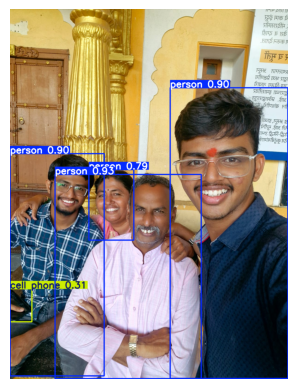

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch # Good practice to import torch

# Load Image
# Make sure the path to your image is correct
try:
    img = cv2.imread('/Users/prachit/Desktop/family.jpg')
    # Check if the image was loaded correctly
    if img is None:
        raise FileNotFoundError("Image not found at the specified path.")
except FileNotFoundError as e:
    print(e)
    # Exit or handle the error appropriately
    exit()


# Load the YOLO model
# Make sure the path to your weights is correct
model = YOLO('weights/yolo11m.pt')  # Load a pre-trained YOLOv8 model

# Perform inference on an image
results = model(img, save=True)  # Save results to 'runs/detect/predict'

# --- START: The Fix is Here ---

# Print results
for result in results:
    print(f"Detected {len(result.boxes)} objects")
    for box in result.boxes:
        # Convert tensor to a simple list for cleaner printing
        bbox_coords = box.xyxy[0].tolist() 
        # Get the class ID as an integer
        class_id = int(box.cls.item())
        # Get the confidence score as a float
        confidence = box.conf.item()

        # Now print the Python native types
        print(f"  Class: {class_id}, Confidence: {confidence:.2f}, BBox: {[int(coord) for coord in bbox_coords]}")

# --- END: The Fix ---

# Display the image with detections (YOLO's results object can plot this for you)
# The results object already contains the plotted image if you want to display it
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [1]:
import pickle
with open('data_DeepGaitV2/person_database/person_db.pkl', 'rb') as f:
    data = pickle.load(f)
print(type(data))
print(dir(data))
print(data)

<class 'app.database_handler.PersonDatabase'>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cosine_similarity', 'add_person', 'add_person_multimodal', 'clear_database', 'get_stats', 'get_top_persons', 'identify_person', 'identify_person_adaptive', 'last_update', 'persons', 'update_person', 'update_person_multimodal']


In [2]:
import pickle
with open('data_DeepGaitV2/person_database/person_db.pkl', 'rb') as f:
    db = pickle.load(f)
print(f"Number of people: {len(db.persons)}")
for pid, pdata in db.persons.items():
    print(f"Person ID: {pid}, Keys: {list(pdata.keys())}, Embeddings: {len(pdata.get('embeddings', []))}")

Number of people: 5
Person ID: P0001, Keys: ['id', 'name', 'embedding', 'face_embedding', 'quality', 'metadata', 'created', 'updated', 'has_face'], Embeddings: 0
Person ID: P0002, Keys: ['id', 'name', 'embedding', 'face_embedding', 'quality', 'metadata', 'created', 'updated', 'has_face'], Embeddings: 0
Person ID: P0003, Keys: ['id', 'name', 'embedding', 'face_embedding', 'quality', 'metadata', 'created', 'updated', 'has_face'], Embeddings: 0
Person ID: P0004, Keys: ['id', 'name', 'embedding', 'face_embedding', 'quality', 'metadata', 'created', 'updated', 'has_face'], Embeddings: 0
Person ID: P0005, Keys: ['id', 'name', 'embedding', 'face_embedding', 'quality', 'metadata', 'created', 'updated', 'has_face'], Embeddings: 0
